In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("masterClean.csv")
df.head(1)

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,EU


In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df["continent"] = df["continent"].fillna("NA")
df.head(1) #Necesito revisar como evitar la creacion de esas columnas y que Norte America se cambie a Nan

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation,continent
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X,EU


In [5]:
df.drop(df[df["country"] == "Macau"].index, inplace=True)

## Diferencias de genero por continente

In [6]:
df_genero = df.groupby(["continent","sex"])

In [7]:
for names,groups in df_genero:
    print(names)
    print(groups)

('AF', 'female')
            country  year     sex          age  suicides_no  population  \
16134     Mauritius  1985  female    75+ years            2        8800   
16139     Mauritius  1985  female  15-24 years           18      106300   
16140     Mauritius  1985  female  55-74 years            4       47900   
16141     Mauritius  1985  female  25-34 years            6       87200   
16142     Mauritius  1985  female  35-54 years            6       90500   
...             ...   ...     ...          ...          ...         ...   
23356  South Africa  2015  female  25-34 years           27     4822164   
23357  South Africa  2015  female  35-54 years           26     6396045   
23358  South Africa  2015  female    75+ years            2      615701   
23359  South Africa  2015  female  55-74 years           10     3155486   
23361  South Africa  2015  female   5-14 years            6     5243427   

       suicides/100k pop      country-year  gdp_for_year ($)   \
16134            

In [8]:
population_gen = df_genero["population"].sum()
population_gen

continent  sex   
AF         female     463877554
           male       444057933
AS         female    5120336135
           male      5022151666
EU         female    9800063989
           male      9042639789
NA         female    6484637063
           male      6261534894
OC         female     330068999
           male       324328214
SA         female    4065050363
           male      3943868434
Name: population, dtype: int64

In [11]:
suicides_gen = df_genero["suicides_no"].sum()
suicides_gen

continent  sex   
AF         female       2606
           male         8707
AS         female     424631
           male      1031034
EU         female     737587
           male      2670538
NA         female     278346
           male      1062293
OC         female      18782
           male        66069
SA         female      97419
           male       349561
Name: suicides_no, dtype: int64

In [40]:
suicides_per_100k_gen = (suicides_gen/population_gen)*100000
suicides_per_100k_gen["AF"]["female"]

0.5617861820492397

In [44]:
AF_F = suicides_per_100k_gen["AF"]["female"]
AS_F = suicides_per_100k_gen["AS"]["female"]
EU_F = suicides_per_100k_gen["EU"]["female"]
NA_F = suicides_per_100k_gen["NA"]["female"]
OC_F = suicides_per_100k_gen["OC"]["female"]
SA_F = suicides_per_100k_gen["SA"]["female"]
suicides_female = [AF_F,AS_F,EU_F,NA_F,OC_F,SA_F]
suicides_female

[0.5617861820492397,
 8.293029770007472,
 7.5263488159658785,
 4.292391344277149,
 5.690325373453204,
 2.396501674043343]

In [45]:
AF_M = suicides_per_100k_gen["AF"]["male"]
AS_M = suicides_per_100k_gen["AS"]["male"]
EU_M = suicides_per_100k_gen["EU"]["male"]
NA_M = suicides_per_100k_gen["NA"]["male"]
OC_M = suicides_per_100k_gen["OC"]["male"]
SA_M = suicides_per_100k_gen["SA"]["male"]
suicides_male = [AF_M,AS_M,EU_M,NA_M,OC_M,SA_M]
suicides_male

[1.960780193966268,
 20.5297264712276,
 29.532725645542133,
 16.965376987963808,
 20.3710306868338,
 8.863404189309222]

In [32]:
continentes = list(df["continent"].unique())
continentes.sort()
continentes

['AF', 'AS', 'EU', 'NA', 'OC', 'SA']

In [37]:
genero = df["sex"].unique()
genero

array(['male', 'female'], dtype=object)

/Users/antonioreyesguerrero/Desktop/PythonCurso/Datos/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

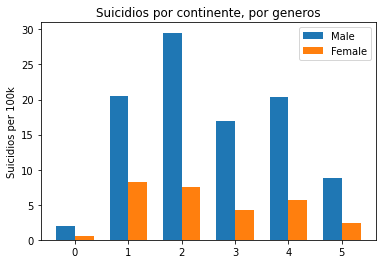

<Figure size 1080x1080 with 0 Axes>

In [53]:
x = np.arange(len(continentes))
width = 0.35
fig, ax = plt.subplots()
plt.figure(figsize=(15,15))
rects1 = ax.bar(x - width/2, suicides_male, width, label='Male')
rects2 = ax.bar(x + width/2, suicides_female, width, label='Female')

ax.set_ylabel('Suicidios per 100k')
ax.set_title('Suicidios por continente, por generos')
ax.set_xticks(x, continentes)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [ ]:
conda 